In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
sns.set_style("whitegrid")

In [3]:
cars = pd.read_csv("../input/car-details-dataset/CAR DETAILS FROM CAR DEKHO.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
cars.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [6]:
cars.duplicated().sum()

763

In [7]:
cars_data = cars.drop_duplicates()
cars_data.duplicated().sum()

0

In [8]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3577.0,2012.962538,4.251759,1992.0,2010.0,2013.0,2016.0,2020.0
selling_price,3577.0,473912.542074,509301.809816,20000.0,200000.0,350000.0,600000.0,8900000.0
km_driven,3577.0,69250.545709,47579.940016,1.0,36000.0,60000.0,90000.0,806599.0


<AxesSubplot:>

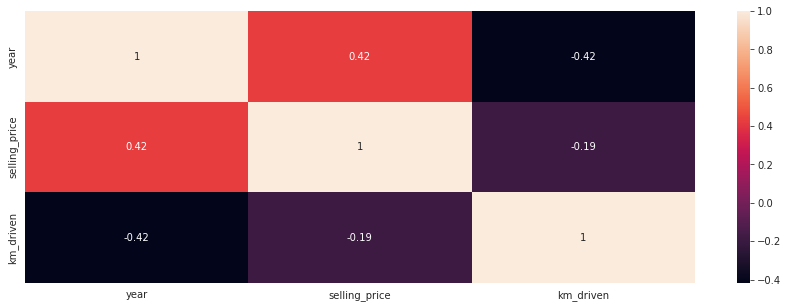

In [9]:
corr = cars_data.corr(method="pearson").T

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True)

# exploratory data analysis

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

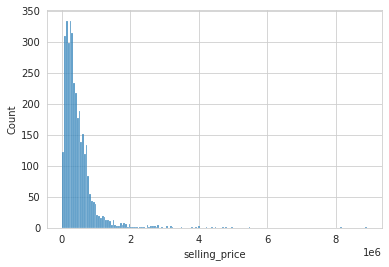

In [10]:
sns.histplot(data=cars_data, x="selling_price")

<AxesSubplot:ylabel='selling_price'>

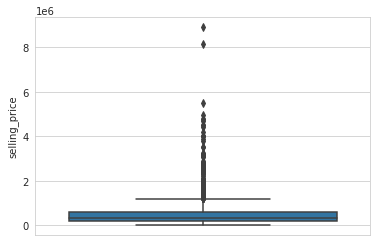

In [11]:
sns.boxplot(data=cars_data, y="selling_price")

# Remove Outliars

In [12]:
q = cars_data["selling_price"].quantile(0.95)
cars_data = cars_data[cars_data['selling_price'] < q]

<AxesSubplot:ylabel='selling_price'>

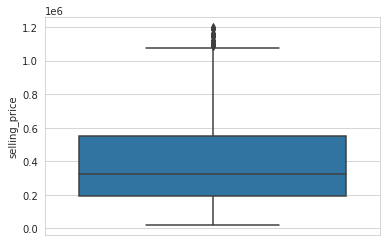

In [13]:
sns.boxplot(data=cars_data, y="selling_price")

<AxesSubplot:xlabel='selling_price', ylabel='Count'>

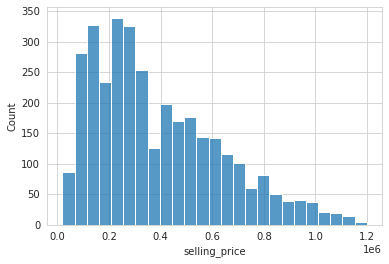

In [14]:
sns.histplot(data=cars_data, x="selling_price")

# Data Analysis

In [15]:
cars_data = cars_data.sort_values("selling_price", ascending=False)

In [16]:
cars_data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

Text(0.5, 1.0, 'the median price based on fuel type')

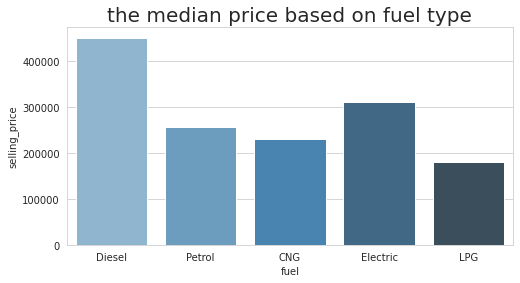

In [17]:
plt.figure(figsize=(8,4))
sns.barplot(data=cars_data, x='fuel', y="selling_price", ci=None, estimator=np.median, palette="Blues_d")
plt.title("the median price based on fuel type", fontsize=20)

Text(0.5, 1.0, 'chinge in price over years for based on fuel type')

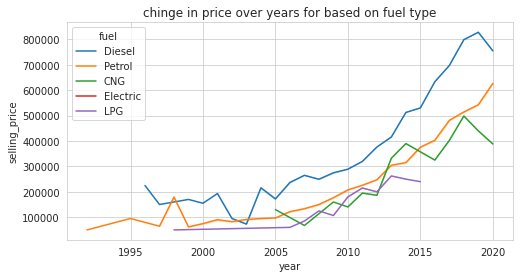

In [18]:
plt.figure(figsize=(8,4))
sns.lineplot(data=cars_data, x="year", y="selling_price", hue="fuel", ci=False)
plt.title("chinge in price over years for based on fuel type")

In [19]:
cars_data = pd.get_dummies(cars_data)

In [20]:
features = cars_data.drop(['selling_price'], axis=1)
target = cars_data['selling_price']


X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.2,
                                                    random_state=42)

In [21]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
models = [RandomForestRegressor(n_estimators=200, max_depth=8, min_samples_leaf=2, random_state=42),
          SGDRegressor(alpha=0.001, random_state=42),
          GradientBoostingRegressor(n_estimators=200, max_depth=8, learning_rate=0.01, random_state=42)]
maes = []

for model in models:
    model = model.fit(X_train, y_train)
    y_hat = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_hat)
    maes.append(mae)

In [23]:
model_mae = pd.DataFrame(data=[models, maes], columns=["RF", "SGD", "GB"])
model_mae.loc[1, :]

RF       114284.725436
SGD    12205061.854436
GB       116322.646667
Name: 1, dtype: object